<a href="https://colab.research.google.com/github/Ebratul/Bioinformatics/blob/main/python_ML_Part_02_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# ফাইল লোড
df3 = pd.read_csv('/content/drive/MyDrive/Colab/data/my_data.csv')

df3.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910


.smi মানে SMILES ফরম্যাটের ডেটা (যেটি chemical structure বোঝাতে ব্যবহৃত হয়)

In [3]:
selection = ['canonical_smiles', 'molecule_chembl_id']
df_selection = df3[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [4]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


#  (PaDEL = Pharmaceutical Data Exploration Lab)

In [5]:
!wget https://github.com/dataprofessor/padel-descriptor/raw/master/PaDEL-Descriptor.jar


--2025-07-08 04:12:04--  https://github.com/dataprofessor/padel-descriptor/raw/master/PaDEL-Descriptor.jar
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-08 04:12:04 ERROR 404: Not Found.



In [6]:
! cat molecule.smi | wc -l

4695


In [7]:
! cat padel.sh

cat: padel.sh: No such file or directory


In [8]:
! bash padel.sh

bash: padel.sh: No such file or directory


In [13]:
! ls -l

total 8476
-rw-r--r-- 1 root root 8356701 Jul  8 04:12 descriptors_output.csv
drwx------ 5 root root    4096 Jul  8 04:11 drive
-rw-r--r-- 1 root root  310658 Jul  8 04:12 molecule.smi
drwxr-xr-x 1 root root    4096 Jul  4 13:34 sample_data


In [14]:
df3_x = pd.read_csv('descriptors_output.csv')
df3_x.head(5)

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df3_y = df3['pIC50']
df3_y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
4690,5.612610
4691,5.595166
4692,5.419075
4693,5.460924


# combining  X and Y variable

In [16]:
dataset3 = pd.concat([df3_x, df3_y], axis = 1)
dataset3

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.124939
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.000000
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.301030
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.522879
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.612610
4691,CHEMBL4282558,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.595166
4692,CHEMBL4281727,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.419075
4693,CHEMBL4292349,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.460924


In [17]:
dataset3.to_csv('ratul.csv', index = False)

# Let's Download the csv file to your local computer for the part 3B (Model Building)

In [18]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

In [21]:
df = pd.read_csv('ratul.csv')
df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.124939
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.000000
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.301030
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.522879
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.612610
4691,CHEMBL4282558,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.595166
4692,CHEMBL4281727,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.419075
4693,CHEMBL4292349,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.460924


# Input feature

The Acetylcholinesterase data set contains 881 input features and 1 output variable(pIC50)

#input feature

In [22]:
x = df.drop(['pIC50','Name'], axis = 1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = df.pIC50
y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
4690,5.612610
4691,5.595166
4692,5.419075
4693,5.460924


# এই ধরনের ডেটা machine learning মডেলে ব্যবহার করা হয়:

যেমন: QSAR modeling, bioactivity prediction, toxicity classification ইত্যাদিতে।

# Let's examinne the deta dimension

In [24]:
x.shape

(4695, 881)

In [25]:
y.shape

(4695,)

# Remove low variancce feature

If 80% of the values in a feature are 1, and 20% are 0


Variance=p*(1−p)

In [26]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(x)


In [27]:
X.shape

(4695, 137)

# Split data (80/20 ratio)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [29]:
x_train.shape, y_train.shape

((3756, 881), (3756,))

In [30]:
x_test.shape, y_test.shape

((939, 881), (939,))

In [34]:
y_test

,pIC50
3078,5.379000
51,3.000000
2342,4.736364
1173,6.096910
101,1.000000
...,...
3140,4.671620
2790,5.259637
2234,6.294136
2415,8.723538


# Building a Regression Model using Random Forest

Random Forest একটি ensemble machine learning technique
যা multiple decision trees ব্যবহার করে কাজ করে।

In [31]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
r2 = model.score(x_test, y_test)
r2

0.5681647730286508

In [32]:
Y_pred = model.predict(x_test)

# Scatter plot of Experimental vs Predicted pIC50 values

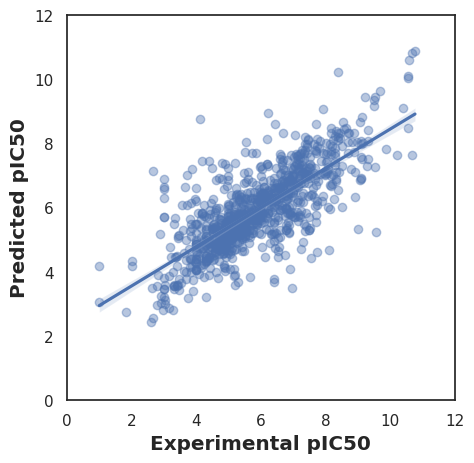

In [33]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.set(color_codes = True)
sb.set_style("white")

ax = sb.regplot(x=y_test, y=Y_pred, scatter_kws = {'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_ylabel('Predicted pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()



In [35]:
! pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 11.9 MB/s eta 0:00:00


In [36]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# load the data set

In [37]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-07-08 04:30:46--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-07-08 04:30:47--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [70]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [71]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10


In [72]:
X = df.drop(["pIC50"],axis = 1)

In [53]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
Y = df.pIC50

In [55]:
x.shape

(4695, 881)

In [56]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(df)

In [60]:
X.shape

(4695, 138)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

# Compare ML algorithm

এটি LazyPredict লাইব্রেরির LazyRegressor ব্যবহার করে multiple regression models একসাথে ট্রেইন ও টেস্ট করার জন্য ব্যবহার করা হয়।

In [62]:
clf = LazyRegressor(verbose = 0, ignore_warnings=True, custom_metric = None)
train, test = clf.fit(x_train,x_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 138
[LightGBM] [Info] Start training from score 5.813517


In [63]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BayesianRidge,1.00,1.00,0.00,0.25
TransformedTargetRegressor,1.00,1.00,0.00,0.08
OrthogonalMatchingPursuit,1.00,1.00,0.00,0.06
OrthogonalMatchingPursuitCV,1.00,1.00,0.00,0.07
RANSACRegressor,1.00,1.00,0.00,0.14
LinearRegression,1.00,1.00,0.00,0.23
LassoLarsCV,1.00,1.00,0.00,0.12
LassoLarsIC,1.00,1.00,0.00,0.25
LarsCV,1.00,1.00,0.00,0.08


 more R² , less RMSE, less time is more good is indicate best model

In [64]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BayesianRidge,1.00,1.00,0.00,0.25
TransformedTargetRegressor,1.00,1.00,0.00,0.08
OrthogonalMatchingPursuit,1.00,1.00,0.00,0.06
OrthogonalMatchingPursuitCV,1.00,1.00,0.00,0.07
RANSACRegressor,1.00,1.00,0.00,0.14
LinearRegression,1.00,1.00,0.00,0.23
LassoLarsCV,1.00,1.00,0.00,0.12
LassoLarsIC,1.00,1.00,0.00,0.25
LarsCV,1.00,1.00,0.00,0.08


In [73]:
import matplotlib.pyplot as plt
import seaborn as snb

[(0.0, 1.0)]

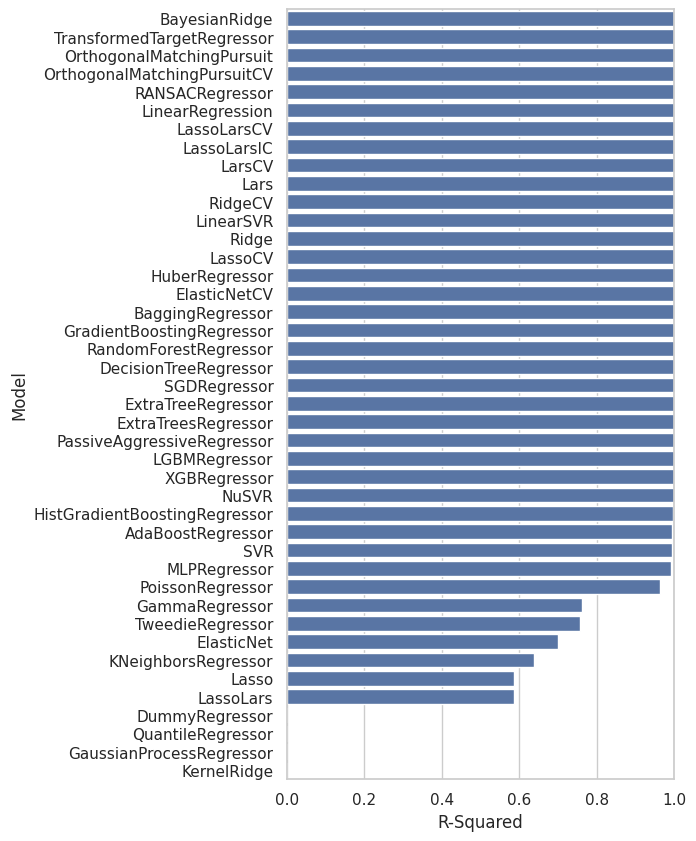

In [81]:
plt.figure(figsize=(5, 10))
sb.set_theme(style="whitegrid")
ax = sb.barplot(y=train.index, x="R-Squared", data = train)
ax.set(xlim=(0,1))

[(0.0, 1.0)]

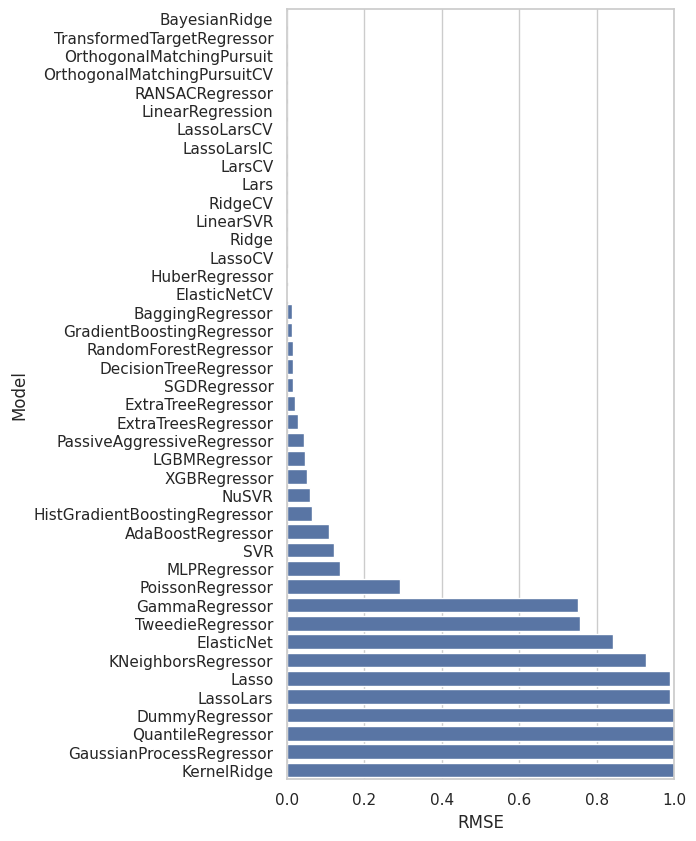

In [82]:
plt.figure(figsize=(5, 10))
sb.set_theme(style="whitegrid")
ax = sb.barplot(y=train.index, x="RMSE", data = train)
ax.set(xlim=(0,1))

[(0.0, 20.0)]

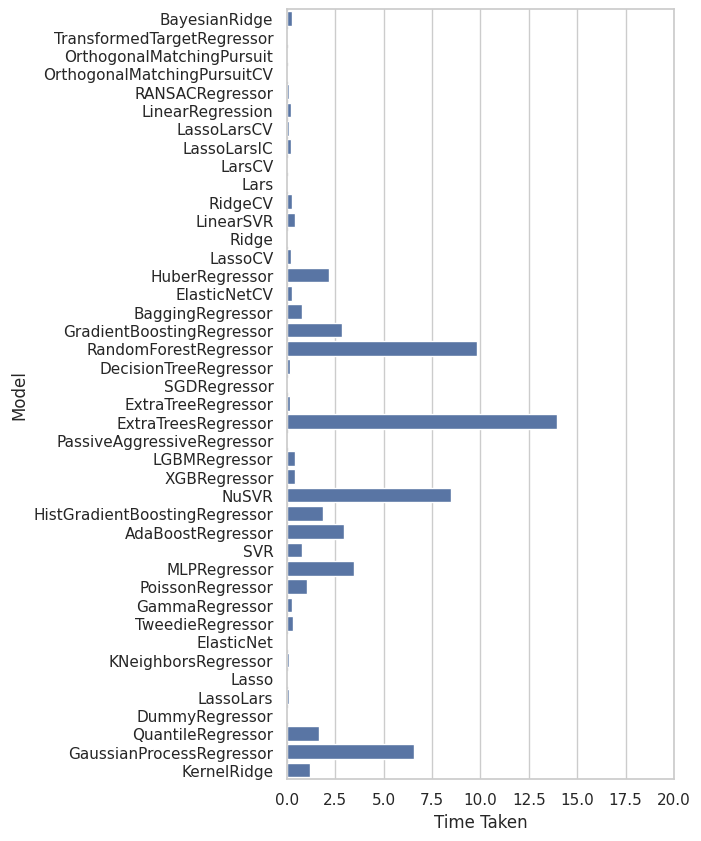

In [89]:
plt.figure(figsize=(5,10))
sb.set_theme(style="whitegrid")
ax = sb.barplot(y=train.index, x="Time Taken", data = train)
ax.set(xlim=(0,20f))

In [92]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


import streamlit as st
import pandas as pd
import subprocess
import os
import base64
import pickle

# Molecular descriptor calculator
def desc_calc():
    # Performs the descriptor calculation
    bashCommand = "java -Xms2G -Xmx2G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/%s -dir ./ -file descriptors_output.csv" % selected_fp
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    # Read in calculated descriptors and display the dataframe
    st.subheader('Calculated molecular descriptors')
    desc = pd.read_csv('descriptors_output.csv')
    st.write(desc)
    st.markdown(filedownload(desc), unsafe_allow_html=True)
    # Write the data dimension (number of molecules and descriptors)
    nmol = desc.shape[0]
    ndesc = desc.shape[1]
    st.info('Selected fingerprint: ' + user_fp)
    st.info('Number of molecules: ' + str(nmol))
    st.info('Number of descriptors: ' + str(ndesc-1))
    os.remove('molecule.smi')

# File download
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()  # strings <-> bytes conversions
    href = f'<a href="data:file/csv;base64,{b64}" download="descriptor_{user_fp}.csv">Download CSV File</a>'
    return href

# Page title
st.markdown("""
# MolDesc - Molecular Descriptor Calculator

This app allows you to calculate descriptors of molecules (aka **molecular descriptors**) that you can use for computational drug discovery projects such as for the construction of quantitative structure-activity/property relationship (QSAR/QSPR) models.

In this app we will be focusing on 12 **molecular fingerprints** (`AtomPairs2D`, `AtomPairs2DCount`, `CDK`, `CDKextended`, `CDKgraphonly`, `EState`, `KlekotaRoth`, `KlekotaRothCount`, `MACCS`, `PubChem`, `Substructure` and `SubstructureCount`).

**Credits**
- App built in `Python` + `Streamlit` by [Chanin Nantasenamat](https://medium.com/@chanin.nantasenamat) (aka [Data Professor](http://youtube.com/dataprofessor))
- Descriptor calculated using [PaDEL-Descriptor](http://www.yapcwsoft.com/dd/padeldescriptor/) software.
- Yap CW. [PaDEL‐descriptor: An open source software to calculate molecular descriptors and fingerprints](https://doi.org/10.1002/jcc.21707). ***J Comput Chem*** 32 (2011) 1466-1474.
---
""")

# Sidebar
with st.sidebar.header('1. Upload your CSV data'):
    uploaded_file = st.sidebar.file_uploader("Upload your input CSV file", type=["csv"])
    st.sidebar.markdown("""
[Example CSV input file](https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv)
""")

with st.sidebar.header('2. Enter column names for 1) Molecule ID and 2) SMILES'):
    name_mol = st.sidebar.text_input('Enter column name for Molecule ID', 'molecule_chembl_id')
    name_smiles = st.sidebar.text_input('Enter column name for SMILES', 'canonical_smiles')

with st.sidebar.header('3. Set parameters'):
    # Select fingerprint
    fp_dict = {'AtomPairs2D':'AtomPairs2DFingerprinter.xml',
               'AtomPairs2DCount':'AtomPairs2DFingerprintCount.xml',
               'CDK':'Fingerprinter.xml',
               'CDKextended':'ExtendedFingerprinter.xml',
               'CDKgraphonly':'GraphOnlyFingerprinter.xml',
               'EState':'EStateFingerprinter.xml',
               'KlekotaRoth':'KlekotaRothFingerprinter.xml',
               'KlekotaRothCount':'KlekotaRothFingerprintCount.xml',
               'MACCS':'MACCSFingerprinter.xml',
               'PubChem':'PubchemFingerprinter.xml',
               'Substructure':'SubstructureFingerprinter.xml',
               'SubstructureCount':'SubstructureFingerprintCount.xml'}
    user_fp = st.sidebar.selectbox('Choose fingerprint to calculate', list(fp_dict.keys()) )
    selected_fp = fp_dict[user_fp]

    # Set number of molecules to compute
    df0 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')
    all_mol = df0.shape[0]
    number2calc = st.sidebar.slider('How many molecules to compute?', min_value=10, max_value=all_mol, value=10, step=10)


if uploaded_file is not None:
    # Read CSV data
    @st.cache
    def load_csv():
        csv = pd.read_csv(uploaded_file).iloc[:number2calc,1:]
        return csv
    df = load_csv()
    df2 = pd.concat([df[name_smiles], df[name_mol]], axis=1)
    # Write CSV data
    df2.to_csv('molecule.smi', sep = '\t', header = False, index = False)
    st.subheader('Initial data from CSV file')
    st.write(df)
    st.subheader('Formatted as PADEL input file')
    st.write(df2)
    with st.spinner("Calculating descriptors..."):
        desc_calc()

else:
    st.info('Awaiting for CSV file to be uploaded.')
    if st.button('Press to use Example Dataset'):
        # Read CSV data
        @st.cache
        def load_data():
            # number2calc specifies the number of molecules to compute
            df = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv').iloc[:number2calc,1:]
            return df
        df = load_data()
        df2 = pd.concat([df[name_smiles], df[name_mol]], axis=1)
        # Write CSV data
        df2.to_csv('molecule.smi', sep = '\t', header = False, index = False)
        st.subheader('Initial data from CSV file')
        st.write(df)
        st.subheader('Formatted as PADEL input file')
        st.write(df2)
        with st.spinner("Calculating descriptors..."):
            desc_calc()
